<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Kmeans Scratch
class ScratchKMeans():
    """
    Scratch implementation of K-means

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point to calculate
    max_iter : int
      Maximum number of iterations per calculation.
    tol : float
      Tolerance between the center point and the center of gravity as a reference to end the iteration.
    verbose : bool
      True if you want to output the learning process.
    """
    def __init__(self, n_clusters=2,n_init=20,max_iter=100,tol=1e-5,verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def _remyu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
        
    def _reclustering(self,X):
        for i in range(len(X)):
            
            dist_m = 10**10
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
    def _sse(self,X):
        self.best_sse = 10**10
        
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
    
    def _silhouette(self,X):
        return
        
    def fit(self, X):
        """
        Compute clustering by K-means
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        """
        
        for k in range(self.n_init):
            
            # Initial setting of the center point μk for the number of clusters
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        
            # Set the clustered value 
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            
            for ite in range(self.max_iter):
                self._reclustering(X_cluster)
                
                old_myu = self.myu
                self._remyu(X_cluster)
            
                # Outputs the learning process when verbose is set to true.
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20
                    
                    for i in range(self.n_clusters):
                        plt.scatter(X[X_cluster[:,-1]==i,0],X[X_cluster[:,-1]==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # Iteration continuation judgment
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X_cluster)
                    break
                
                self._sse(X_cluster)
                
            
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

In [3]:
# Kmeans Scratch (code readability < calculation speed)
class ScratchKMeans_speed():
    """
    Scratch implementation of K-means

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point to calculate
    max_iter : int
      Maximum number of iterations per calculation.
    tol : float
      Tolerance between the center point and the center of gravity as a reference to end the iteration.
    verbose : bool
      True if you want to output the learning process.
    """
    def __init__(self, n_clusters=2,n_init=20,max_iter=100,tol=1e-5,verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def _remyu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[self.cluster==j],axis=0)
        
    def _reclustering(self,X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        
        self.cluster = np.argmin(self.dist,axis=1)
        
    def _sse(self,X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        sse = np.sum(np.min(self.dist,axis=1)**2)
        
        self.best_sse = 10**10
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            self._silhouette(X) if self.n_clusters >=2 else _
    
    def _silhouette(self,X):
        ab = np.zeros([len(X),2])
        
        self.silhouette_vals = np.zeros(len(X))
        
        for i,j in enumerate(X):
            ab[i,0] = np.sum(np.linalg.norm(j-X[self.cluster == self.cluster[i]],ord=2,axis=1))/len(X[self.cluster == self.cluster[i]]-1)
            ab[i,1] = np.mean(np.linalg.norm(j-X[self.cluster == self.dist[i].argsort()[1]],ord=2,axis=1))
        
            self.silhouette_vals[i] = (ab[i,1] - ab[i,0])/np.max(ab[i])
        
        self.silhouette_avg = np.mean(self.silhouette_vals)
        self.y_km = self.cluster
        self.cluster_labels = np.unique(self.cluster)
        
    def fit(self, X):
        """
        Compute clustering by K-means
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        """
        
        for k in range(self.n_init):
            
            # Initial setting of the center point μk for the number of clusters
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            
            for ite in range(self.max_iter):
                self._reclustering(X)
                
                old_myu = self.myu
                self._remyu(X)
            
                # Outputs the learning process when verbose is set to true.
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20
                    
                    for i in range(self.n_clusters):
                        plt.scatter(X[self.cluster==i,0],X[self.cluster==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # Iteration continuation judgment
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X)
                    break
                
                self._sse(X)
                
            
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        diff = (X-self.record_myu[:,None]).reshape(-1,2)
        dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.record_cluster,-1).T
        return np.argmin(dist,axis=1)

In [4]:
# Simple Data Set 3
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [5]:
X.shape

(100, 2)

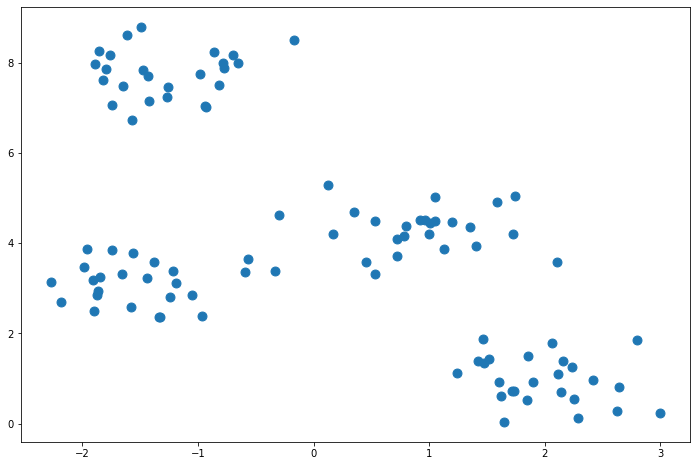

In [6]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

【Problem 1】Determine the initial value of the center point.

In [7]:
# Select k randomly.
k = 2
myu = X[np.random.choice(len(X),size=k,replace=False)]
print(myu.shape)
print(myu)

(2, 2)
[[-0.98661744  7.74968685]
 [-1.32890066  2.37135151]]


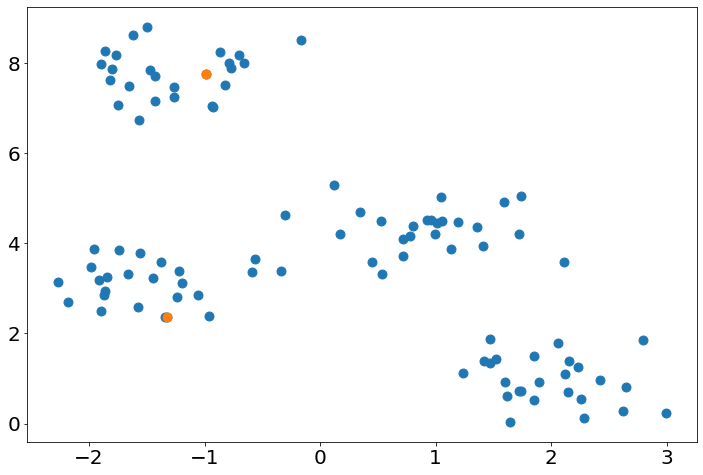

In [8]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

【Problem 2】Creating a function to find the SSE

In [9]:
num =10

# Add a label for verification.
label = np.random.randint(0,k,len(X[0:num]))
X_test = np.concatenate([X[0:num],label.reshape(-1,1)],axis=1)
print(X_test.shape)
print(X_test)

(10, 3)
[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  1.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  1.        ]
 [ 0.78260667  4.15263595  1.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  1.        ]
 [ 0.12313498  5.27917503  1.        ]
 [-1.43284669  7.71577043  1.        ]]


In [10]:
# Calculating Euclidean Distance
np.sqrt(np.sum((X[0]-myu[0])**2))

4.382526823289758

In [11]:
# Calculated in L2 norm
np.linalg.norm(X[0]-myu[0],ord=2)

4.382526823289758

In [12]:
# SSE Small test
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.sqrt(np.sum((X_test[i,0:2]-myu[j])**2))
    print(sse)

4.382526823289758
5.6261547094691045
4.117061856344927
3.843167856033104
3.866200382502979


In [13]:
# Calculated in L2 norm
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.linalg.norm(X_test[i,0:2]-myu[j])
    print(sse)

4.382526823289758
5.6261547094691045
4.117061856344927
3.843167856033104
3.866200382502979


【Problem 3】Allocating to clusters

In [14]:
# Re-clustering Small test
for i in range(5):
    dist_m = 10**10
    for j in range(len(myu)):
        dist = np.sqrt(np.sum((X_test[i,:-1]-myu[j])**2))
        print(dist)
        if dist < dist_m:
            dist_m = dist
            X_test[i,-1] = j
        
    print('New_Label:',X_test[i,2])

4.382526823289758
2.45006834648279
New_Label: 1.0
0.9341719126259637
5.6261547094691045
New_Label: 0.0
4.117061856344927
3.3445578451985307
New_Label: 1.0
3.843167856033104
3.1902710368987246
New_Label: 1.0
3.839091838280986
3.866200382502979
New_Label: 0.0


In [15]:
# Re-clustering Small test
dist_nd = np.zeros([len(X),k])
print(dist_nd.shape)

for i in range(len(X)):
    for j in range(k):
        dist_nd[i,j] = np.linalg.norm(X[i]-myu[j])
print(dist_nd[0:5])

(100, 2)
[[4.38252682 2.45006835]
 [0.93417191 5.62615471]
 [4.11706186 3.34455785]
 [3.84316786 3.19027104]
 [3.83909184 3.86620038]]


In [16]:
# Difference of ndarray - Checking
show = False
if show:
    for i in range(len(X)):
        for j in range(k):
            print(X[i]-myu[j])
# Can't we do it without the for?？
norm = (X-myu[:,None]).reshape(-1,2)
#tmp = norm.reshape(-1,2)

# reshape(n_clusters,-1).T
cal = np.linalg.norm(norm,ord=2,axis=1).reshape(2,-1).T
cal[0:5]

array([[4.38252682, 2.45006835],
       [0.93417191, 5.62615471],
       [4.11706186, 3.34455785],
       [3.84316786, 3.19027104],
       [3.83909184, 3.86620038]])

In [17]:
cl = np.argmin(cal,axis=1)
cl

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

【Problem 4】Moving the center point

In [18]:
# Move the center point μk Test small
np.mean(X_test[X_test[:,2]==0,:-1],axis=0)

array([-0.75359522,  5.58229248])

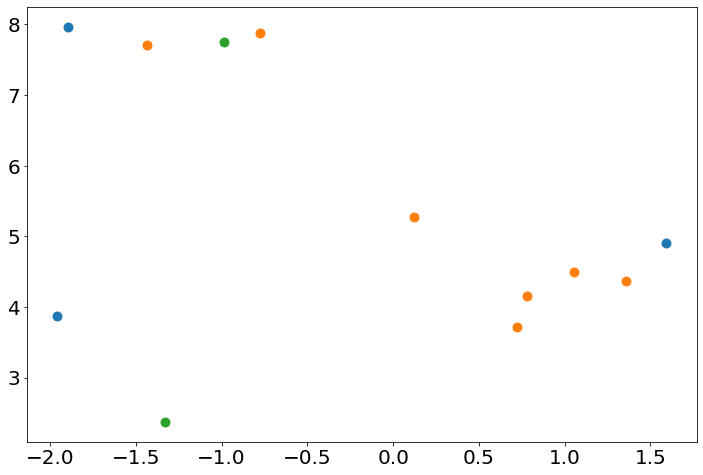

In [19]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X_test[X_test[:,2]==0,0],X_test[X_test[:,2]==0,1],s=80)
plt.scatter(X_test[X_test[:,2]==1,0],X_test[X_test[:,2]==1,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

【Problem 5】Repeat

In [20]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(80, 2)
(20, 2)


【Problem 6】Calculate with different initial values

In [21]:
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)
clf.fit(X_train)

【Problem 7】Estimation

In [23]:
# Scratch clustering to estimate validation data
pred = clf.predict(X_valid)
print(pred)

[0. 3. 0. 2. 3. 2. 0. 1. 0. 1. 3. 2. 2. 3. 2. 2. 3. 0. 2. 1.]


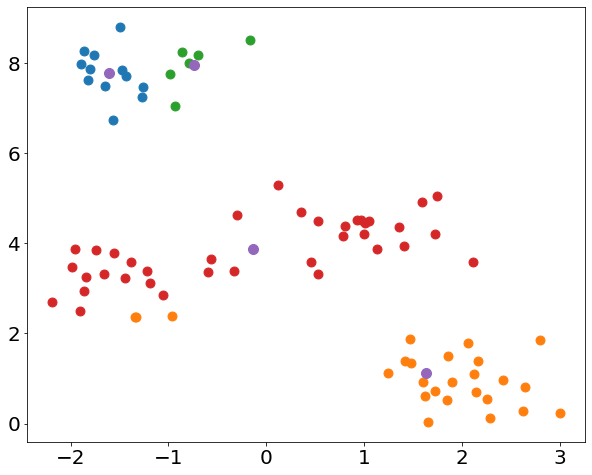

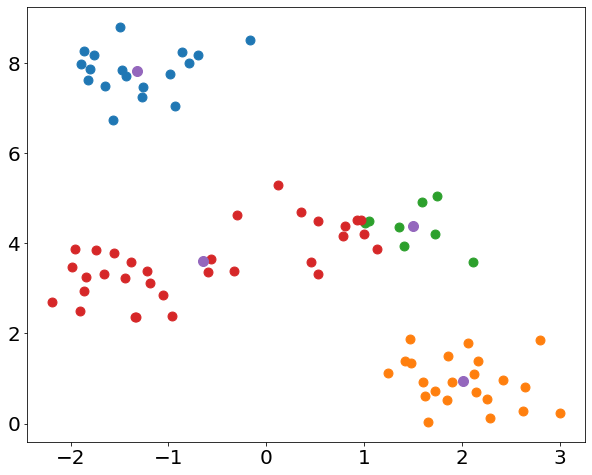

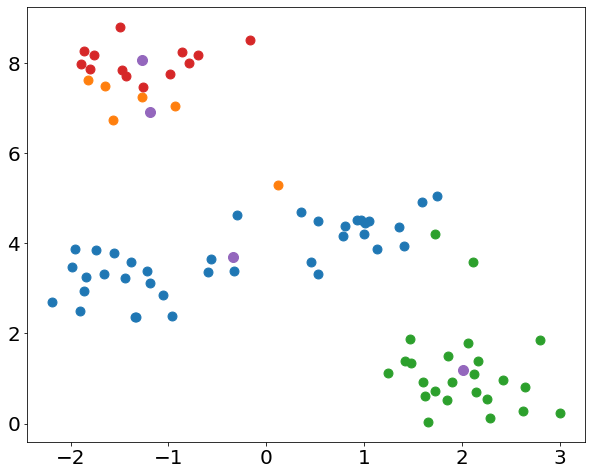

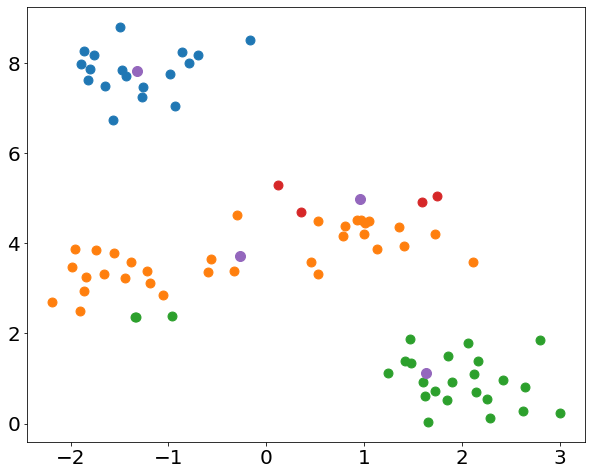

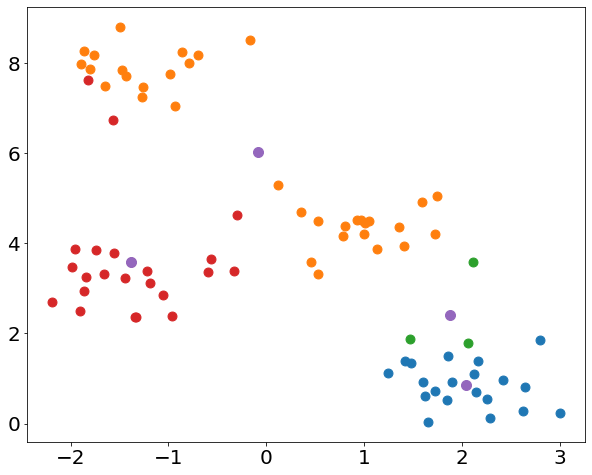

In [24]:
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=True)
clf2.fit(X_train)

In [25]:
# Estimate validation data with Scratch Clustering2
pred = clf2.predict(X_valid)
print(pred)

[3 3 2 1 3 1 2 0 1 0 3 1 1 3 1 1 3 1 1 0]


In [26]:
%%timeit
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

The slowest run took 12.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 729 ns per loop


In [27]:
%%timeit
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

The slowest run took 8.98 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 757 ns per loop


【Problem 8】Implementing the Elbow Method

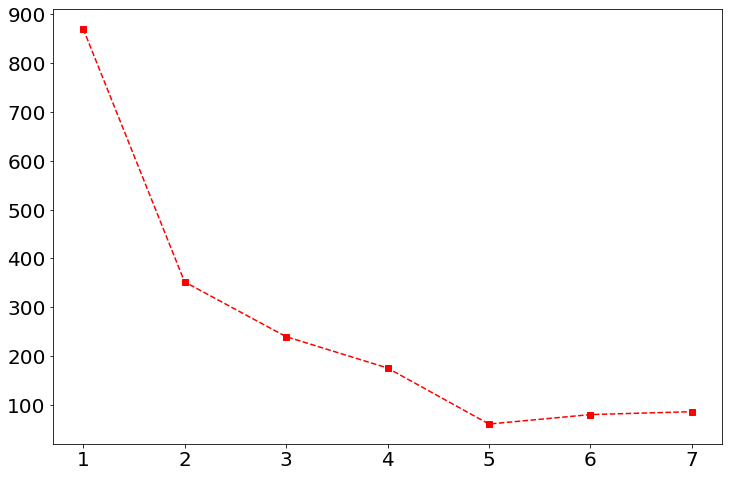

In [28]:
# Model evaluation with elbow method (visualization)）
elbow = {}
for k in range(1,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

【Problem 9】(Advanced Problem) Silhouette drawing

In [29]:
# Sort, get index
print(myu)
print(myu[1].argsort()[1])

[[-0.98661744  7.74968685]
 [-1.32890066  2.37135151]]
1


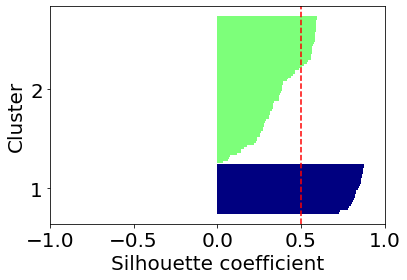

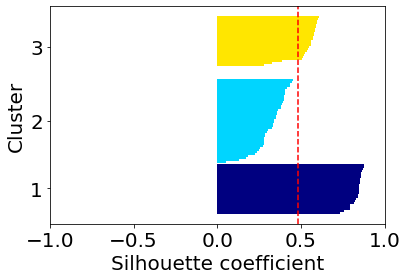

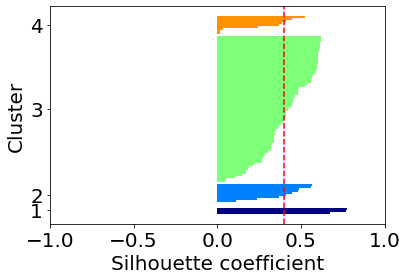

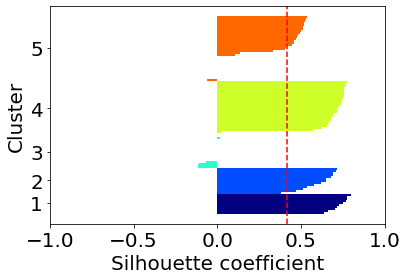

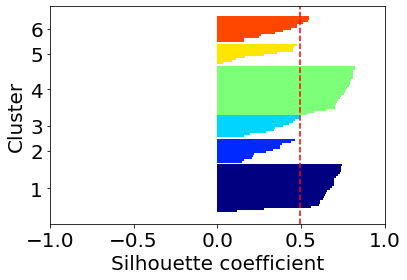

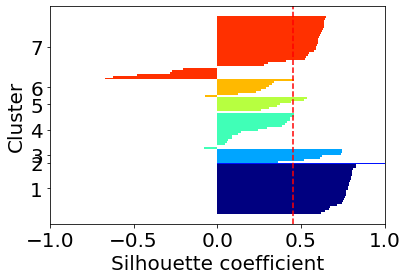

In [30]:
# Visualize a silhouette diagram
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(X)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhouette_vals = model.silhouette_vals[model.y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    plt.axvline(model.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.xlim(-1,1)
    plt.show()

In [34]:
from google.colab import files
files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


{'Wholesale customers data.csv': b'Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen\r\n2,3,12669,9656,7561,214,2674,1338\r\n2,3,7057,9810,9568,1762,3293,1776\r\n2,3,6353,8808,7684,2405,3516,7844\r\n1,3,13265,1196,4221,6404,507,1788\r\n2,3,22615,5410,7198,3915,1777,5185\r\n2,3,9413,8259,5126,666,1795,1451\r\n2,3,12126,3199,6975,480,3140,545\r\n2,3,7579,4956,9426,1669,3321,2566\r\n1,3,5963,3648,6192,425,1716,750\r\n2,3,6006,11093,18881,1159,7425,2098\r\n2,3,3366,5403,12974,4400,5977,1744\r\n2,3,13146,1124,4523,1420,549,497\r\n2,3,31714,12319,11757,287,3881,2931\r\n2,3,21217,6208,14982,3095,6707,602\r\n2,3,24653,9465,12091,294,5058,2168\r\n1,3,10253,1114,3821,397,964,412\r\n2,3,1020,8816,12121,134,4508,1080\r\n1,3,5876,6157,2933,839,370,4478\r\n2,3,18601,6327,10099,2205,2767,3181\r\n1,3,7780,2495,9464,669,2518,501\r\n2,3,17546,4519,4602,1066,2259,2124\r\n1,3,5567,871,2010,3383,375,569\r\n1,3,31276,1917,4469,9408,2381,4334\r\n2,3,26373,36423,22019,5154,4337,16523\r\n2,3

In [36]:
# Cluster Analysis Library Import
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore')
data = pd.DataFrame(pd.read_csv('./Wholesale customers data.csv'))
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [37]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [38]:
# describe
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


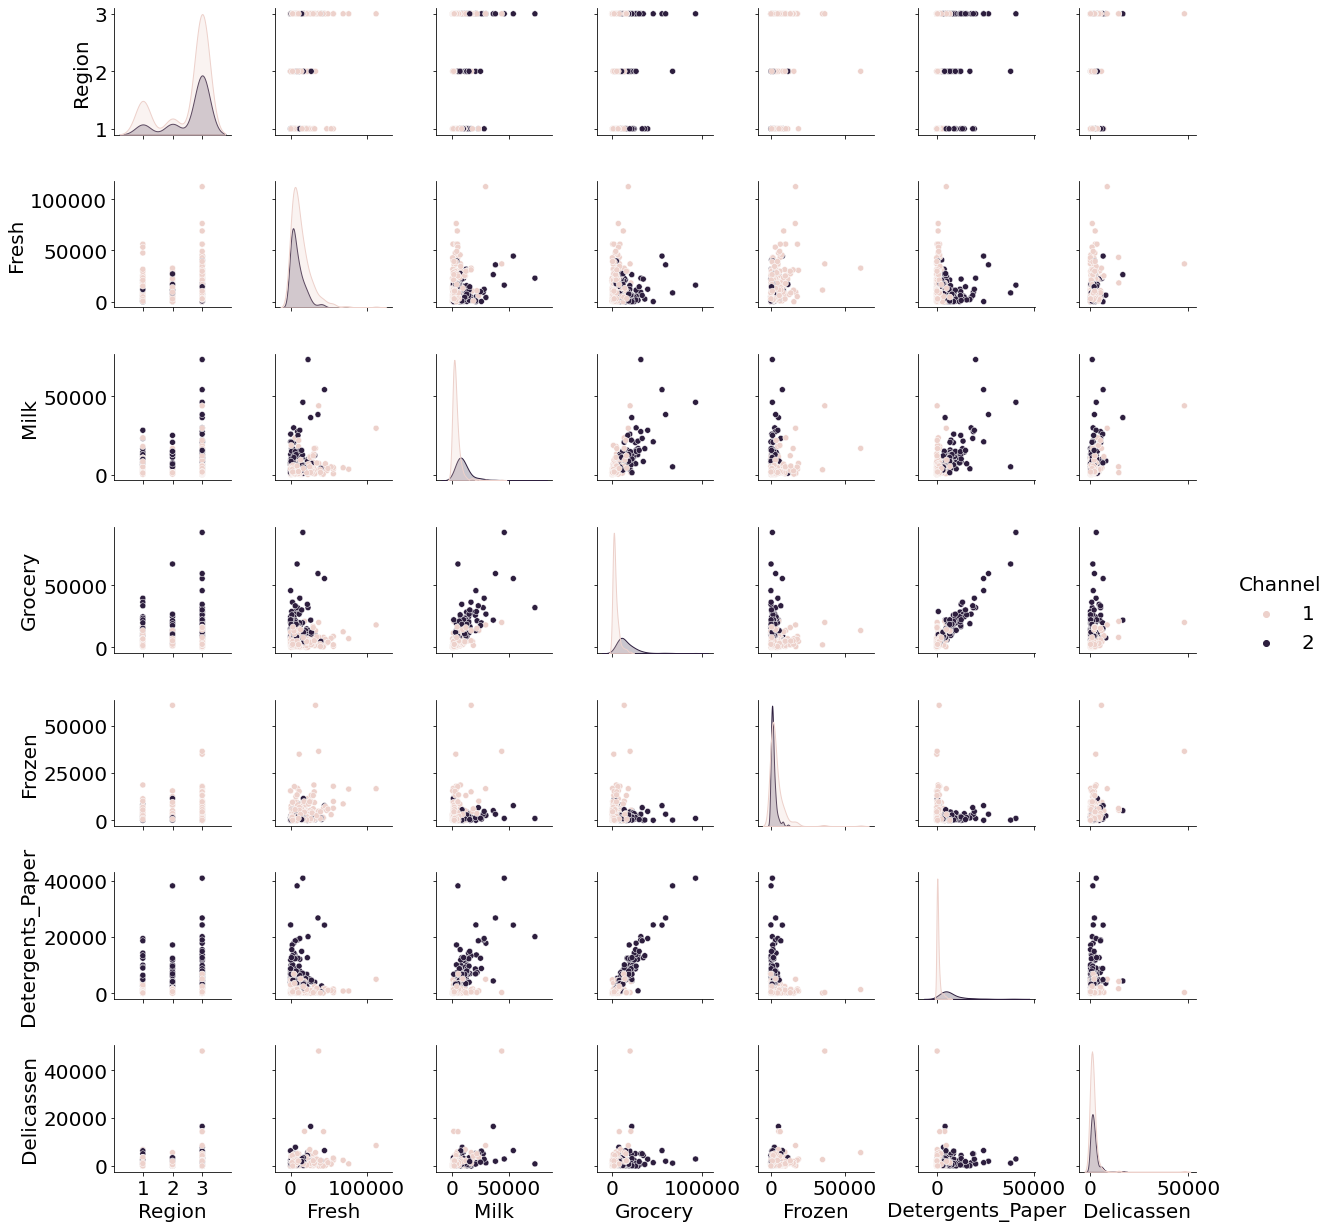

In [39]:
# pairplot
sns.pairplot(data,hue='Channel');

In [40]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [41]:
data.groupby(['Region']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [42]:
data.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


【Problem 10】Selecting the number of clusters k

In [43]:
# Delete Channel and Region
data_c = data.iloc[:,2:7]
data_c

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,12669,9656,7561,214,2674
1,7057,9810,9568,1762,3293
2,6353,8808,7684,2405,3516
3,13265,1196,4221,6404,507
4,22615,5410,7198,3915,1777
...,...,...,...,...,...
435,29703,12051,16027,13135,182
436,39228,1431,764,4510,93
437,14531,15488,30243,437,14841
438,10290,1981,2232,1038,168


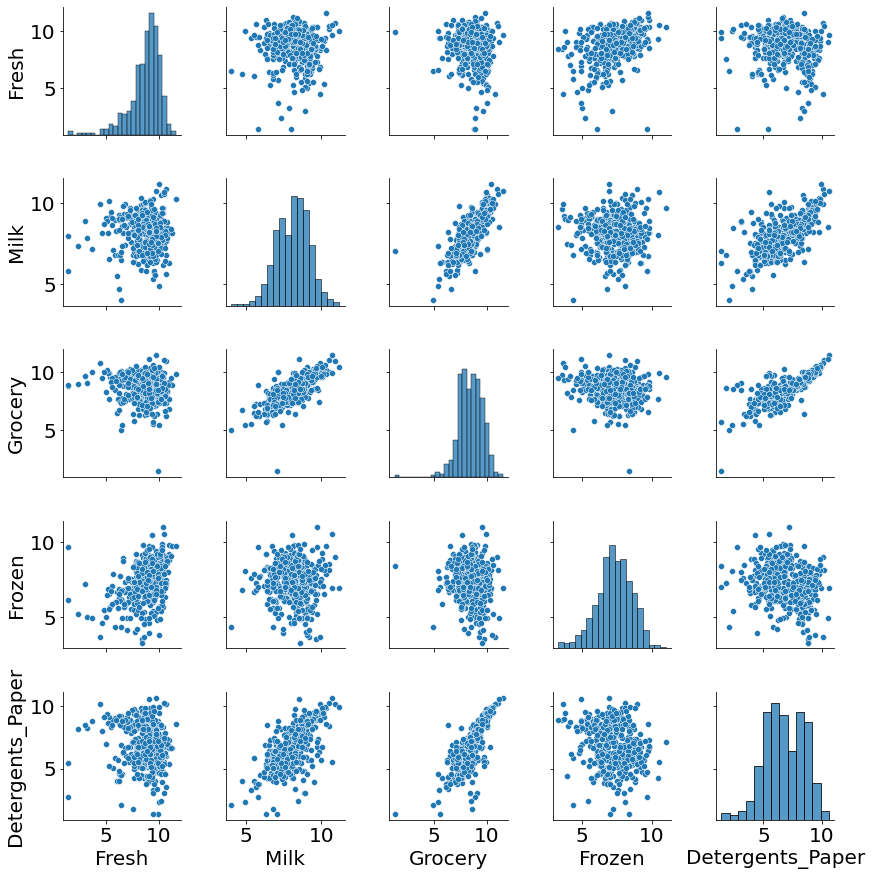

In [44]:
# logarithmic transformation
data_log = data_c.apply(np.log1p)
# pairplot
sns.pairplot(data_log);

[0.51817458 0.79198904 0.91505809 0.9729018 ]


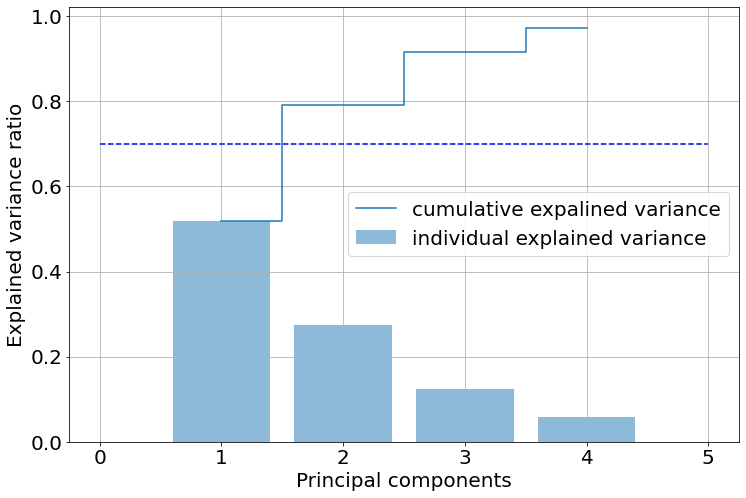

In [45]:
# dispersion explanation rate
n = 4

pca = PCA(n_components=n)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

fig = plt.subplots(figsize=(12,8))
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

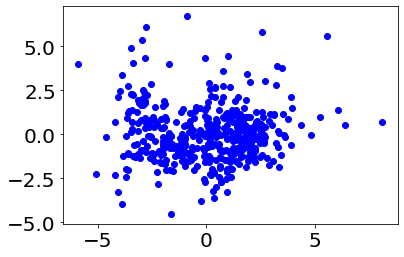

In [46]:
# PCA analysis (dimension reduction for visualization)）
pca = PCA(n_components=2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
plt.plot(data_pca[:,0],data_pca[:,1],'bo');

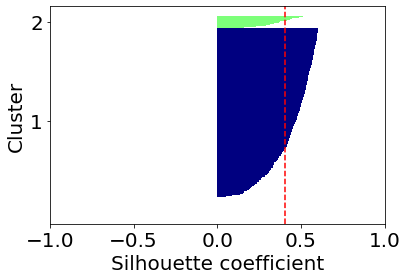

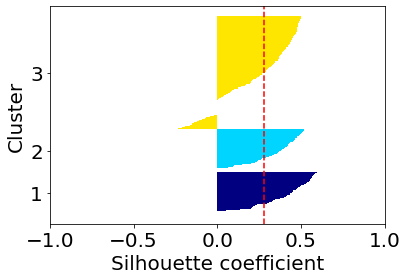

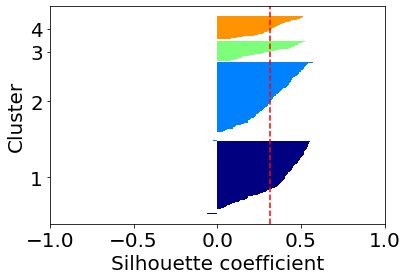

In [50]:
# Visualize a silhouette diagram

plt.rcParams["font.size"] = 20

for k in range(2,5):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(data_pca)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhouette_vals = model.silhouette_vals[model.y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    plt.axvline(model.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.xlim(-1,1)
    plt.show()

In [51]:
# k=3 clustering
model = ScratchKMeans_speed(n_clusters=3,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)
# Label values after clustering
cluster = model.y_km

# Join to data
data['Cluster'] = cluster
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [52]:
data_pca_label_ = np.concatenate([data_pca,cluster.reshape(-1,1)],axis=1)
data_pca_label_

array([[-1.6933576 , -0.05905416,  1.        ],
       [-1.65123599, -0.76059128,  0.        ],
       [-1.51792715, -0.79642891,  0.        ],
       ...,
       [-3.60228374, -1.14311892,  0.        ],
       [ 1.8106657 ,  0.30024815,  1.        ],
       [ 0.18304615,  2.59817873,  1.        ]])

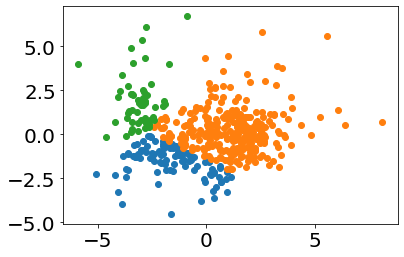

In [53]:
# Visualization
for i in range(model.n_clusters):
    plt.scatter(data_pca_label_[cluster==i,0],data_pca_label_[cluster==i,1]);

【Problem 11】Comparison with known groups

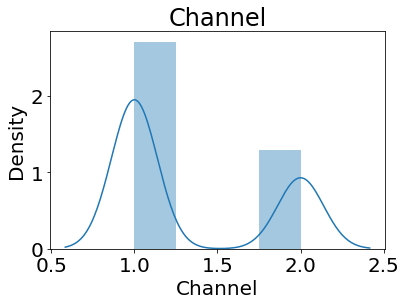

In [54]:
feature = 'Channel'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);

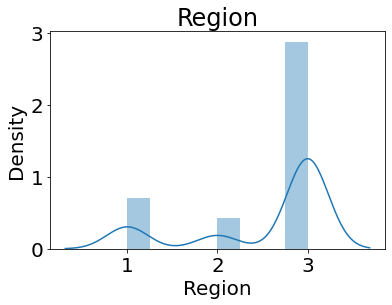

In [55]:
feature = 'Region'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);

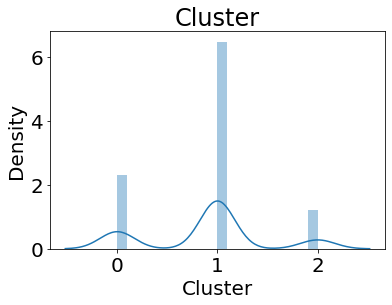

In [56]:
feature = 'Cluster'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);


【Problem 12】Useful information for wholesalers

In [57]:
data.groupby(['Channel','Region','Cluster']).agg(['mean','max','min'])

Fresh                         Milk         \
                                mean     max    min          mean    max   
Channel Region Cluster                                                     
1       1      0        28962.750000   56083   2806  10381.125000  23527   
               1        10482.700000   31614    514   2755.800000  10678   
               2         5396.000000    5396   5396   7503.000000   7503   
        2      0        32717.000000   32717  32717  16784.000000  16784   
               1        10870.296296   29635      3   1767.962963   3696   
        3      0        34379.304348  112151   2438   8646.173913  43950   
               1        11897.977654   56159    190   2750.541899  21858   
               2          867.444444    4456      3   4949.333333   8847   
2       1      0         9389.500000   20782   3067  13973.750000  28326   
               1         2530.000000    2790   2362   5228.000000   7097   
               2         1394.000000    3062     18  10235.000000  16599   
        2      0        11465.571429   27082   3996  12899.714286  25071   
               1         9814.750000   16823   6758   2646.000000   4560   
               2         2373.500000    8565    161   9217.875000  20655   
        3      0        13822.145455   44466   2771  13942.345455  73498   
               1        10107.476190   39679   1406   5690.714286  16729   
               2         2063.206897   22039     23   9195.586207  25862   

                                    Grocery                      Frozen  \
                          min          mean    max    min          mean   
Channel Region Cluster                                                    
1       1      0         2567   7701.375000  15538   2124   6833.500000   
               1          258   3305.700000  16966    489   2595.060000   
               2         7503  10646.000000  10646  10646     91.000000   
        2      0        16784  13626.000000  13626  13626  60869.000000   
               1          333   4053.629630  11593   1330   3703.407407   
        3      0         1266   9302.565217  21042   2548   9676.434783   
               1           55   2970.452514  16483      3   3053.860335   
               2         1534   8270.111111  13227   3823    267.444444   
2       1      0         5921  21569.500000  39694   5615   3873.125000   
               1         2527   8277.250000  11364   5265   2649.500000   
               2         6154  21138.333333  36486  13916    821.833333   
        2      0         6243  16581.714286  26839   6360   1300.285714   
               1          928   6232.000000   9965   2743   3591.250000   
               2         3688  21150.000000  67298   8852    725.500000   
        3      0         2884  18102.872727  92780   5876   2260.836364   
               1         1124   8525.000000  28986   4523    965.000000   
               2         1275  17257.482759  45828   6981    492.241379   

                                     Detergents_Paper               \
                          max    min             mean    max   min   
Channel Region Cluster                                               
1       1      0        18711   1374      1472.125000   5828   284   
               1        11422    327       802.740000   4762     5   
               2           91     91      4167.000000   4167  4167   
        2      0        60869  60869      1272.000000   1272  1272   
               1        15601    264       453.481481   1679    15   
        3      0        36534   1148      1846.869565   5079   182   
               1        35009     47       507.184358   3485     3   
               2          443     25      3636.222222   6907   223   
2       1      0         8321    864     10564.375000  19410   955   
               1         5612    913      4093.750000   5957   788   
               2         2221     61      7860.833333  13308  4797   
        2      0         1840

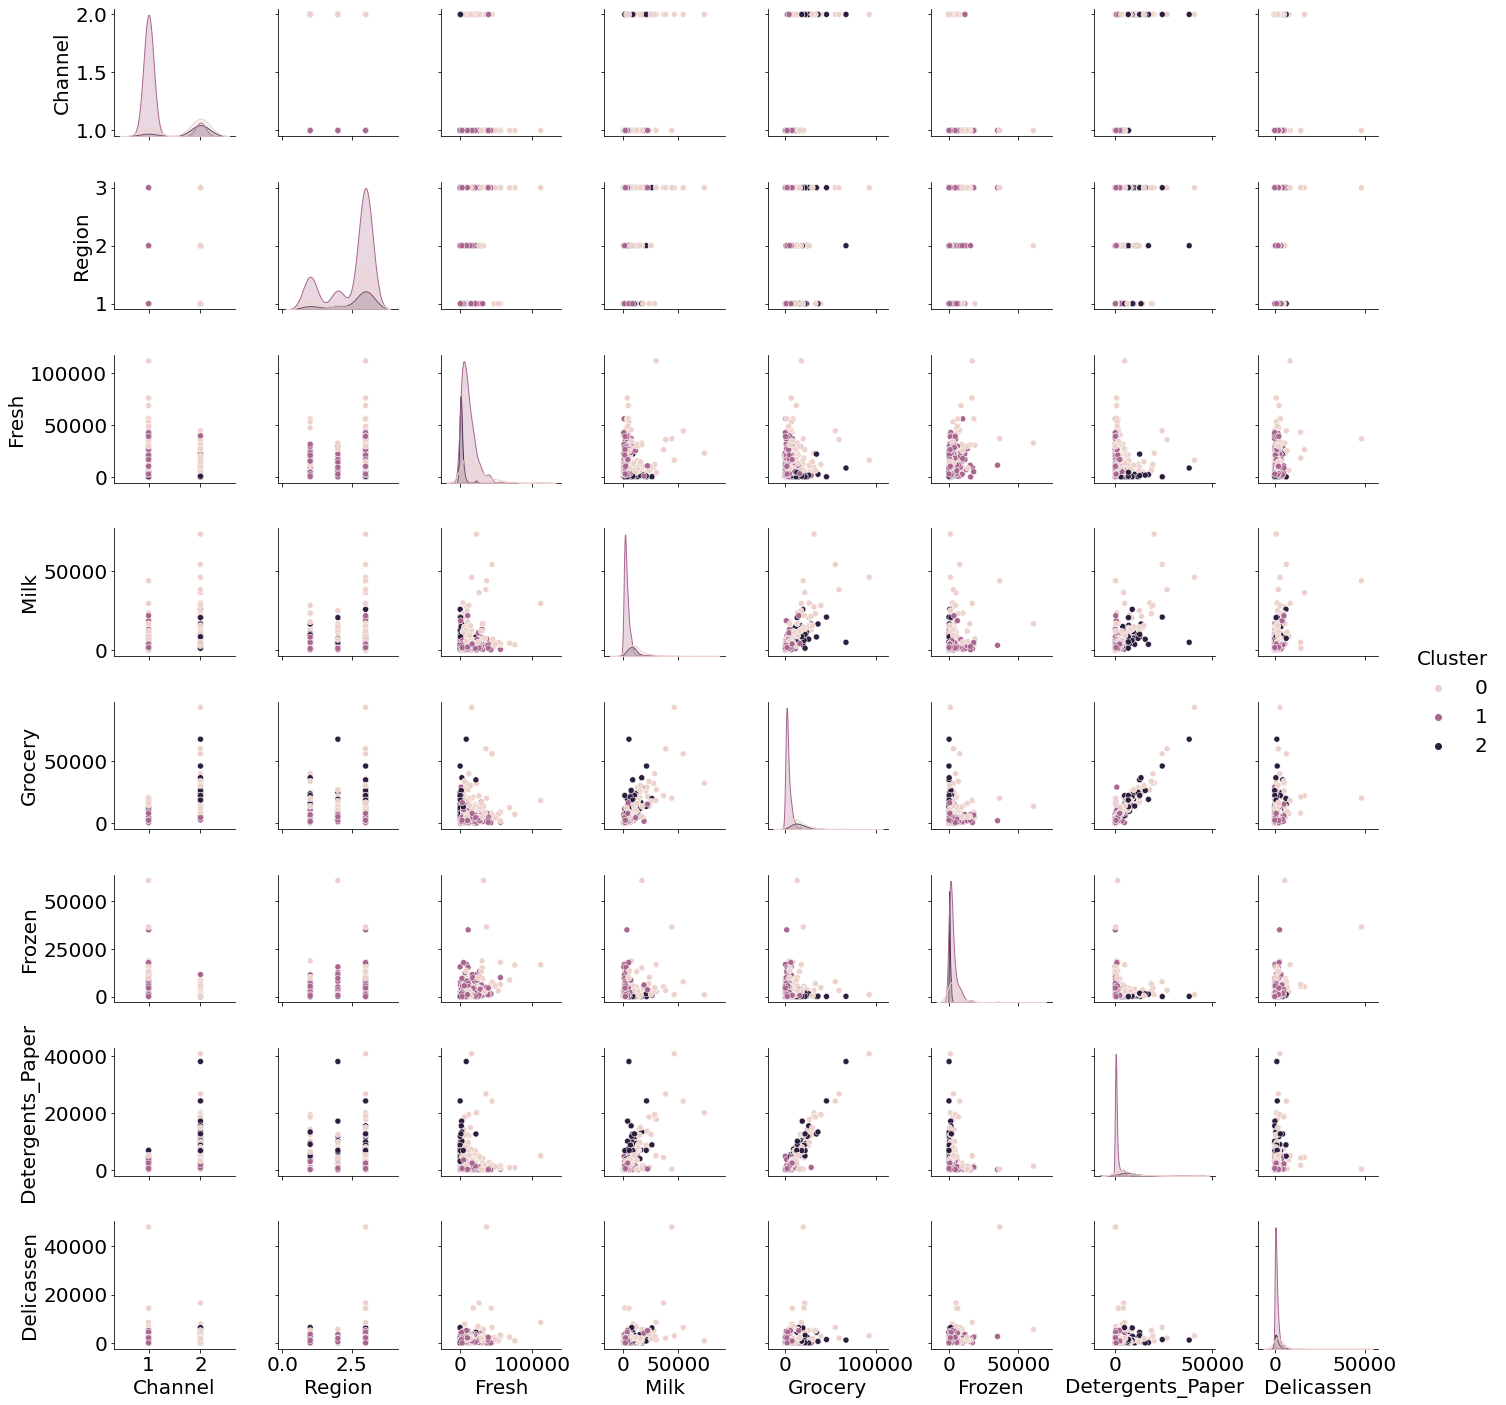

In [58]:
# pairplot
sns.pairplot(data,hue='Cluster');